In [56]:
# dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# import fire csvs
fireDamage = pd.read_csv("./Clean Data/FireDamageCounty_Clean.csv")
fireDuration = pd.read_csv("./Clean Data/FireDurationCounty_Clean.csv")

# import weather csvs
dt32 = pd.read_csv("./Clean Data/DT32_Clean.csv")
dx90 = pd.read_csv("./Clean Data/DX90_Clean.csv")
emxp = pd.read_csv("./Clean Data/EMXP_Clean.csv")
emxt = pd.read_csv("./Clean Data/EMXT_Clean.csv")
prcp = pd.read_csv("./Clean Data/PRCP_Clean.csv")
tavg = pd.read_csv("./Clean Data/TAVG_Clean.csv")
tmax = pd.read_csv("./Clean Data/TMAX_Clean.csv")
tmin = pd.read_csv("./Clean Data/TMIN_Clean.csv")

In [86]:
# group all variables by year
damageYearTotals = fireDamage.groupby(["Year"])
damageYearTotals = damageYearTotals["Acres Burned"].sum()

durationYearTotals = fireDuration.groupby(["Year"])
durationYearTotals = durationYearTotals["Duration (Days)"].sum()

dx90YearTotals = dx90.groupby(["Year"])
dx90YearTotals = dx90YearTotals["DX90"].sum()

emxpYearTotals = emxp.groupby(["Year"])
emxpYearTotals = emxpYearTotals["EMXP"].sum()

emxtYearTotals = emxt.groupby(["Year"])
emxtYearTotals = emxtYearTotals["EMXT"].sum()

prcpYearTotals = prcp.groupby(["Year"])
prcpAveYearTotals = prcpYearTotals["PRCP"].mean()
prcpSumYearTotals = prcpYearTotals["PRCP"].sum()

tavgYearTotals = tavg.groupby(["Year"])
tavgYearTotals = tavgYearTotals["TAVG"].mean()

tmaxYearTotals = tmax.groupby(["Year"])
tmaxAveYearTotals = tmaxYearTotals["TMAX"].mean()
tmaxSumYearTotals = tmaxYearTotals["TMAX"].sum()

tminYearTotals = tmin.groupby(["Year"])
tminAveYearTotals = tminYearTotals["TMIN"].mean()
tminSumYearTotals = tminYearTotals["TMIN"].sum()

In [87]:
# add all variables to the same dataframe
annualCAtotals = pd.DataFrame(damageYearTotals)
annualCAtotals["Duration (Days)"] = durationYearTotals
annualCAtotals["DX90"] = dx90YearTotals
annualCAtotals["EMXP"] = emxpYearTotals
annualCAtotals["EMXT"] = emxtYearTotals
annualCAtotals["PRCP Ave"] = prcpAveYearTotals
annualCAtotals["PRCP Sum"] = prcpSumYearTotals
annualCAtotals["TAVG"] = tavgYearTotals
annualCAtotals["TMAX Ave"] = tmaxAveYearTotals
annualCAtotals["TMAX Sum"] = tmaxSumYearTotals
annualCAtotals["TMIN Ave"] = tminAveYearTotals
annualCAtotals["TMIN Sum"] = tminSumYearTotals


annualCAtotals

,Acres Burned,Duration (Days),DX90,EMXP,EMXT,PRCP Ave,PRCP Sum,TAVG,TMAX Ave,TMAX Sum,TMIN Ave,TMIN Sum
Year,,,,,,,,,,,,
2013,496123.0,452.0,2708.413460,79.33,5560.0,8.717269,435.863464,57.975776,70.732775,3607.371516,45.203894,2305.398585
2014,297186.0,825.0,3449.543725,225.33,6029.0,24.397685,1390.668038,60.389203,72.482017,4058.992963,48.346128,2707.383143
2015,332622.0,17185.0,3202.943617,179.55,6153.0,16.394027,950.853586,59.851378,71.826107,4094.088079,47.897763,2730.172464
2016,452406.0,18430.0,3103.878645,195.53,6120.0,30.553554,1772.106130,58.880800,70.492438,4018.068973,47.316859,2697.060968
2017,1264155.0,70265.0,3432.177368,226.89,6242.0,34.946927,2026.921759,59.184024,70.768419,3963.031492,47.611580,2666.248492
2018,1531391.0,50930.0,2994.784890,181.03,6040.0,21.840896,1266.771962,58.904042,70.835184,3966.770314,46.989238,2631.397326
2019,285439.0,998.0,2689.396306,225.04,5953.0,34.196570,1983.401056,57.791823,68.999768,3863.986981,46.577024,2608.313362
2020,2521233.0,1579.0,3725.257453,82.04,6227.0,11.509818,575.490908,59.744531,71.824985,4022.199176,47.693593,2670.841197


In [89]:
damage = annualCAtotals["Acres Burned"]
duration = annualCAtotals["Duration (Days)"]

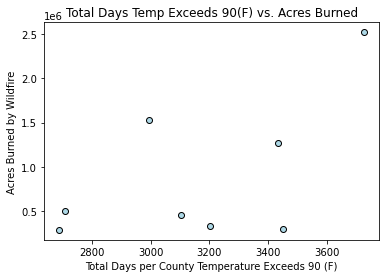

r-value: 0.58


In [91]:
daysOver90 = annualCAtotals["DX90"]
plt.scatter(daysOver90,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Total Days per County Temperature Exceeds 90 (F)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Total Days Temp Exceeds 90(F) vs. Acres Burned")
plt.show()
corr = st.pearsonr(daysOver90,damage)
print(f"r-value: {round(corr[0],2)}")

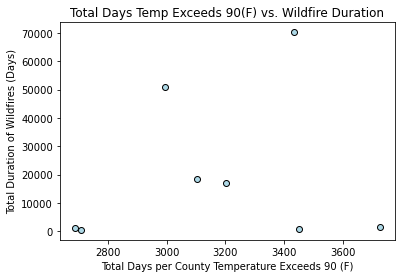

r-value: 0.15


In [92]:
plt.scatter(daysOver90,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Total Days per County Temperature Exceeds 90 (F)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Total Days Temp Exceeds 90(F) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(daysOver90,duration)
print(f"r-value: {round(corr[0],2)}")

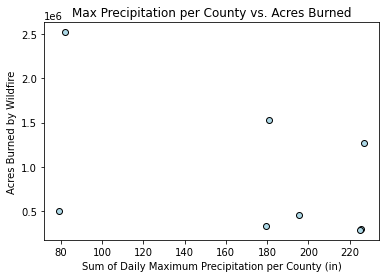

r-value: -0.47


In [99]:
maxPrecip = annualCAtotals["EMXP"]
plt.scatter(maxPrecip,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Daily Maximum Precipitation per County (in)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Max Precipitation per County vs. Acres Burned")
plt.show()
corr = st.pearsonr(maxPrecip,damage)
print(f"r-value: {round(corr[0],2)}")

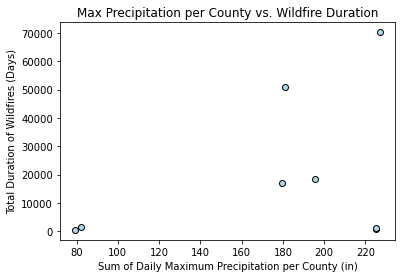

r-value: 0.39


In [100]:
plt.scatter(maxPrecip,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Daily Maximum Precipitation per County (in)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Max Precipitation per County vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(maxPrecip,duration)
print(f"r-value: {round(corr[0],2)}")

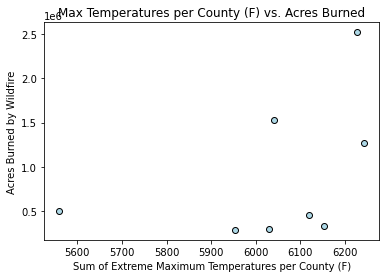

r-value: 0.43


In [101]:
extremeMaxTemp = annualCAtotals["EMXT"]
plt.scatter(extremeMaxTemp,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Extreme Maximum Temperatures per County (F)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Max Temperatures per County (F) vs. Acres Burned")
plt.show()
corr = st.pearsonr(extremeMaxTemp,damage)
print(f"r-value: {round(corr[0],2)}")

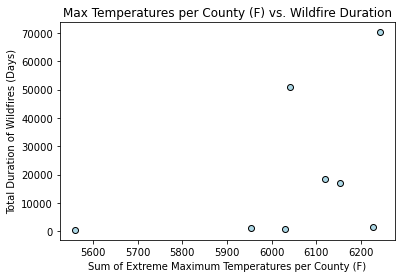

r-value: 0.43


In [104]:
plt.scatter(extremeMaxTemp,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Extreme Maximum Temperatures per County (F)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Max Temperatures per County (F) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(extremeMaxTemp,duration)
print(f"r-value: {round(corr[0],2)}")

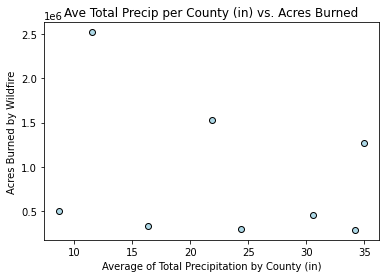

r-value: -0.29


In [103]:
aveTotalPrecip = annualCAtotals["PRCP Ave"]
plt.scatter(aveTotalPrecip,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Average of Total Precipitation by County (in)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Ave Total Precip per County (in) vs. Acres Burned")
plt.show()
corr = st.pearsonr(aveTotalPrecip,damage)
print(f"r-value: {round(corr[0],2)}")

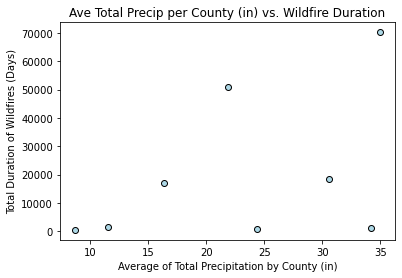

r-value: 0.44


In [107]:
plt.scatter(aveTotalPrecip,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Average of Total Precipitation by County (in)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Ave Total Precip per County (in) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(aveTotalPrecip,duration)
print(f"r-value: {round(corr[0],2)}")

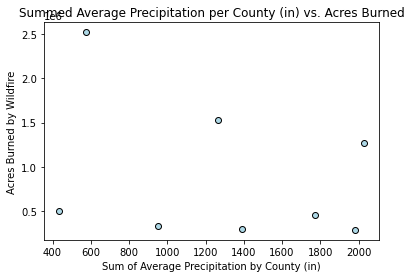

r-value: -0.31


In [108]:
sumAvePrecip = annualCAtotals["PRCP Sum"]
plt.scatter(sumAvePrecip,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Average Precipitation by County (in)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Summed Average Precipitation per County (in) vs. Acres Burned")
plt.show()
corr = st.pearsonr(sumAvePrecip,damage)
print(f"r-value: {round(corr[0],2)}")

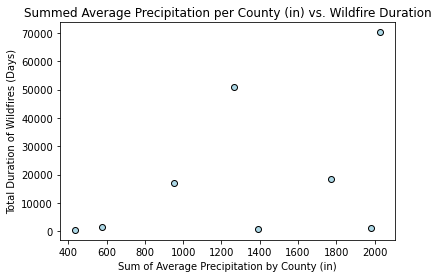

r-value: 0.45


In [105]:
plt.scatter(sumAvePrecip,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Average Precipitation by County (in)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Summed Average Precipitation per County (in) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(sumAvePrecip,duration)
print(f"r-value: {round(corr[0],2)}")

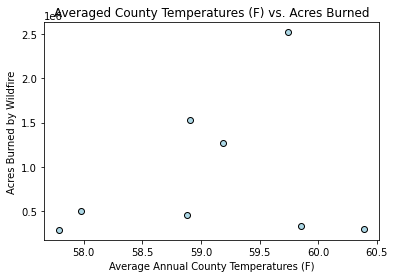

r-value: 0.22


In [109]:
aveTemp = annualCAtotals["TAVG"]
plt.scatter(aveTemp,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Average Annual County Temperatures (F)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Averaged County Temperatures (F) vs. Acres Burned")
plt.show()
corr = st.pearsonr(aveTemp,damage)
print(f"r-value: {round(corr[0],2)}")

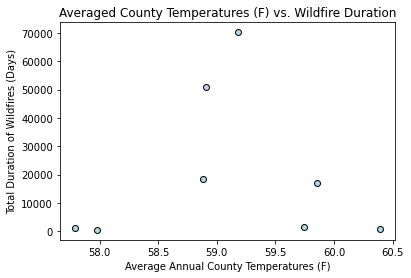

r-value: 0.04


In [110]:
plt.scatter(aveTemp,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Average Annual County Temperatures (F)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Averaged County Temperatures (F) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(aveTemp,duration)
print(f"r-value: {round(corr[0],2)}")

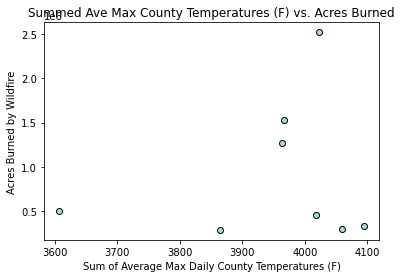

r-value: 0.17


In [111]:
aveMaxTempSum = annualCAtotals["TMAX Sum"]
plt.scatter(aveMaxTempSum,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Average Max Daily County Temperatures (F)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Summed Ave Max County Temperatures (F) vs. Acres Burned")
plt.show()
corr = st.pearsonr(aveMaxTempSum,damage)
print(f"r-value: {round(corr[0],2)}")

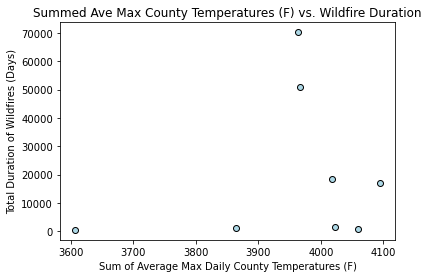

r-value: 0.19


In [112]:
plt.scatter(aveMaxTempSum,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Sum of Average Max Daily County Temperatures (F)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Summed Ave Max County Temperatures (F) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(aveMaxTempSum,duration)
print(f"r-value: {round(corr[0],2)}")

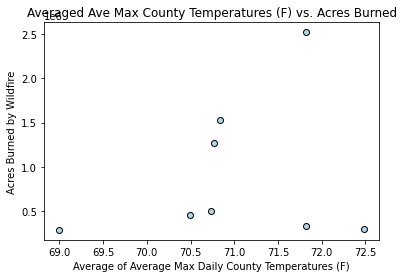

r-value: 0.22


In [113]:
aveMaxTempAve = annualCAtotals["TMAX Ave"]
plt.scatter(aveMaxTempAve,damage,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Average of Average Max Daily County Temperatures (F)")
plt.ylabel("Acres Burned by Wildfire")
plt.title("Averaged Ave Max County Temperatures (F) vs. Acres Burned")
plt.show()
corr = st.pearsonr(aveMaxTempAve,damage)
print(f"r-value: {round(corr[0],2)}")

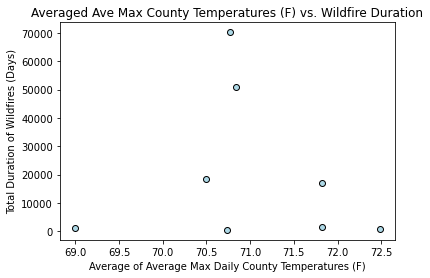

r-value: -0.09


In [114]:
plt.scatter(aveMaxTempAve,duration,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Average of Average Max Daily County Temperatures (F)")
plt.ylabel("Total Duration of Wildfires (Days)")
plt.title("Averaged Ave Max County Temperatures (F) vs. Wildfire Duration")
plt.show()
corr = st.pearsonr(aveMaxTempAve,duration)
print(f"r-value: {round(corr[0],2)}")

In [115]:
# merge DX90 and fire extent
damageDX90 = pd.merge(fireDamage, dx90, on=["Year","County"])
damageDX90

,Year,County,Acres Burned,DX90
0,2013,Alameda,328.0,19.900000
1,2013,Amador,96.0,45.500000
2,2013,Butte,3237.0,63.625000
3,2013,Calaveras,77.0,62.000000
4,2013,Contra Costa,3877.0,30.375000
...,...,...,...,...
345,2020,Trinity,117.0,55.333333
346,2020,Tulare,1397.0,52.583333
347,2020,Tuolumne,2867.0,83.250000
348,2020,Ventura,4266.0,61.625000


In [94]:
# # check for correlation across all counties
# daysOver90 = damageDX90.loc[:,"DX90"]
# extent = damageDX90.loc[:,"Acres Burned"]

# plt.scatter(daysOver90,damage,marker="o",facecolors="lightblue",edgecolors="black")
# plt.xlabel("Number of Days Temperature Is Over 90 (F)")
# plt.ylabel("Acres Burned by Wildfire")
# plt.title("California - Total Days Temp Exceeds 90(F) vs. Acres Burned")
# plt.ylim(0,160000)
# plt.show()
# corr = st.pearsonr(daysOver90,damage)
# print(f"r-value: {round(corr[0],2)}")

In [95]:
# # check for correlation in solano county
# solanoDamageDX90 = damageDX90.loc[damageDX90["County"] == "Solano",:]
# solanoDamageDX90

# solanoDaysOver90 = solanoDamageDX90.loc[:,"DX90"]
# solanoDamage = solanoDamageDX90.loc[:,"Acres Burned"]

# plt.scatter(solanoDaysOver90,solanoDamage,marker="o",facecolors="lightblue",edgecolors="black")
# plt.xlabel("Number of Days Temperature Is Over 90 (F)")
# plt.ylabel("Acres Burned by Wildfire")
# plt.title("Solano County - Total Days Temp Exceeds 90(F) vs. Acres Burned")
# plt.show()
# corr = st.pearsonr(solanoDaysOver90,solanoDamage)
# print(f"r-value: {round(corr[0],2)}")

In [96]:
# solanoDamageDX90

In [97]:
# # check for correlation in sacramento county
# sacramentoDamageDX90 = damageDX90.loc[damageDX90["County"].str.contains("Sacramento"),:]
# sacramentoDamageDX90

# sacramentoDaysOver90 = sacramentoDamageDX90.loc[:,"DX90"]
# sacramentoDamage = sacramentoDamageDX90.loc[:,"Acres Burned"]

# plt.scatter(sacramentoDaysOver90,sacramentoDamage,marker="o",facecolors="lightblue",edgecolors="black")
# plt.xlabel("Number of Days Temperature Is Over 90 (F)")
# plt.ylabel("Acres Burned by Wildfire")
# plt.title("Sacramento County - Total Days Temp Exceeds 90(F) vs. Acres Burned")
# plt.show()
# corr = st.pearsonr(sacramentoDaysOver90,sacramentoDamage)
# print(f"r-value: {round(corr[0],2)}")

In [98]:
# # merge DX90 and fire duration
# durationDX90 = pd.merge(fireDuration, dx90, on=["Year","County"])
# durationDX90